# NLP Final Project

## *Equipo 4*:
| <h4>Alumno</h4> | <h4>Matricula</h4> |
| ---|---|
| <h5>Mauricio Juárez Sánchez</h5> | <h5>A01660336</h5> |
| <h5>Alfredo Jeong Hyun Park</h5> | <h5>A01658259</h5> |
| <h5>Fernando Alfonso Arana Salas</h5> | <h5>A01272933</h5> |
| <h5>Miguel Ángel Bustamante Pérez</h5> | <h5>A01781583</h5> |

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from nltk.corpus import wordnet
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## TASKS

###   2.1 Corpus Creation

In [37]:
# We create a NLTK corpus from this text file
corpus = PlaintextCorpusReader('.', 'toyStory1.csv')
corpus2 = PlaintextCorpusReader('.', 'toyStory2.csv')

##### Word Tokenization

In [38]:
#Applying tokenization
raw_text = corpus.raw()
raw_text += corpus2.raw()
tokens = nltk.word_tokenize(raw_text)
tokens = [word.lower() for word in tokens]
print(tokens[:50])

['transcript', ':', '[', ']', '01', 'sheriff', 'woody', '[', ']', '[', 'the', 'walt', 'disney', 'pictures', 'logo', 'plays', ',', 'except', 'the', 'castle', 'is', 'in', 'cgi', ',', 'while', 'the', 'camera', 'zooms', 'out', 'from', 'its', 'gate', '.', 'when', 'the', 'logo', 'completes', ',', 'it', 'zooms', 'out', 'until', 'it', 'fades', 'into', 'a', 'kid', "'s", 'bedroom', ',']


##### Sentence Tokenization

In [39]:
#Applying sentence tokenization
sentences = sent_tokenize(raw_text)
print(sentences[:10])

['Transcript:[]\n01 Sheriff Woody[]\n[The Walt Disney Pictures logo plays, except the castle is in CGI, while the camera zooms out from its gate.', "When the logo completes, it zooms out until it fades into a kid's bedroom, with boxes made to look like buildings which are placed in different areas.", 'A kid, Andy Davis, holds a Mr.', 'Potato Head toy in front of one of them]\nAndy (as One-Eyed Bart): Alright, everyone!', 'This is a stick-up!', "Don't anybody move!", 'Now empty that safe!', '[Andy shakes a piggy bank (Hamm) and a few coins fall out]\nAndy (as One-Eyed Bart): [chuckles] Money, money, money!', '[Andy makes Potato Head (One-Eyed Bart] ""kiss"" the coins]\nAndy (as Bo Peep): Stop it!', 'Stop it, you mean old potato!']


---

##### POS Tagging

In [40]:
# Define a function to convert NLTK's POS tags to wordnet's POS tags
def get_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos.startswith('V'):
        return wordnet.VERB
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Use noun as a default

# Applying POS tagging
pos_tags = nltk.pos_tag(tokens)

---

#### Lemmatization

In [41]:
# Filtering out stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Lemmatizing the words
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags if word.isalpha() and word.lower() not in stop_words]
# Creating a frequency distribution of words
fdist = FreqDist(lemmatized_tokens)
print(lemmatized_tokens[:100])

['transcript', 'sheriff', 'woody', 'walt', 'disney', 'picture', 'logo', 'play', 'except', 'castle', 'cgi', 'camera', 'zoom', 'gate', 'logo', 'complete', 'zoom', 'fade', 'kid', 'bedroom', 'box', 'make', 'look', 'like', 'building', 'place', 'different', 'area', 'kid', 'andy', 'davis', 'hold', 'mr', 'potato', 'head', 'toy', 'front', 'one', 'andy', 'bart', 'alright', 'everyone', 'anybody', 'move', 'empty', 'safe', 'andy', 'shake', 'piggy', 'bank', 'hamm', 'coin', 'fall', 'andy', 'bart', 'chuckle', 'money', 'money', 'money', 'andy', 'make', 'potato', 'head', 'bart', 'kiss', 'coin', 'andy', 'bo', 'peep', 'stop', 'stop', 'mean', 'old', 'potato', 'andy', 'bart', 'quiet', 'bo', 'peep', 'sheep', 'get', 'run', 'sheep', 'toy', 'car', 'track', 'andy', 'set', 'room', 'andy', 'sheep', 'help', 'baa', 'help', 'u', 'andy', 'bo', 'peep', 'oh', 'sheep']


#### Word Frequency

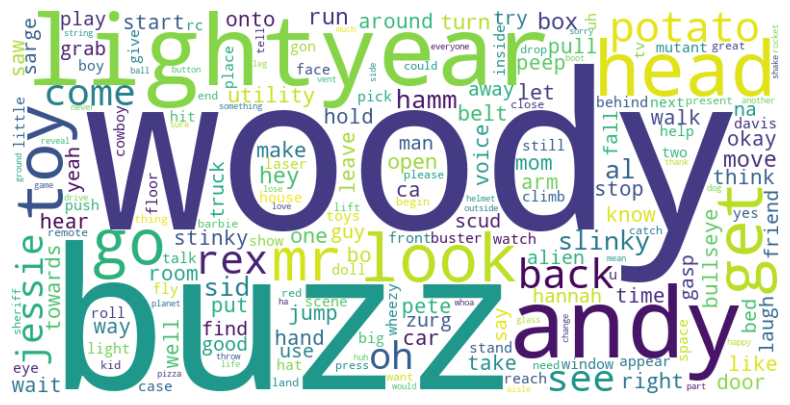

In [42]:
# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color="white").generate_from_frequencies(fdist)
# We display our wordcloud with aid of matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

woody: 1166 times
buzz: 932 times
lightyear: 318 times
andy: 316 times
head: 276 times
look: 275 times
toy: 269 times
get: 259 times
go: 247 times
mr: 224 times


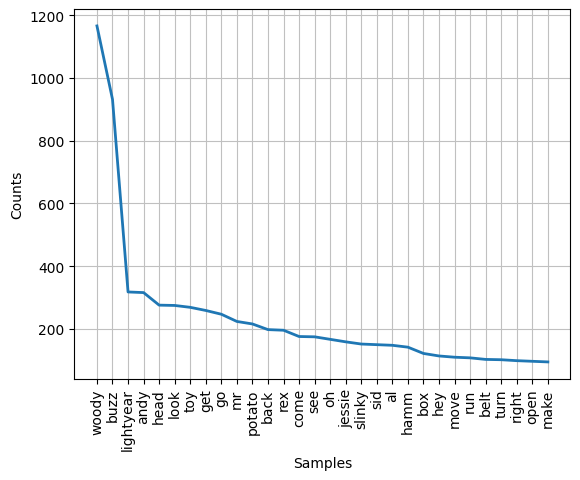

In [43]:
# We get the most common words and their frequencies
most_common = fdist.most_common(10)
for word, freq in most_common:
    print(f"{word}: {freq} times")

# We plot the frequency for the 30 most common words
fdist.plot(30, cumulative=False)
plt.show()

### Collocations

#### Bigrams

In [44]:
bigram_finder = BigramCollocationFinder.from_words(lemmatized_tokens)
# We score brigrams by their frequency
#The score divides the count of the bigrams divided by the total amount of trigrams.
bigram_scores = bigram_finder.score_ngrams(BigramAssocMeasures.raw_freq)
for bigram, score in bigram_scores[:10]:
    print(f"{bigram}: {score}")

('buzz', 'lightyear'): 0.0138913311060313
('potato', 'head'): 0.00931950061543872
('mr', 'potato'): 0.008572182169861086
('utility', 'belt'): 0.004044311587831897
('belt', 'buzz'): 0.003956391770705117
('stinky', 'pete'): 0.0036047125021979954
('woody', 'buzz'): 0.003033233690873923
('bo', 'peep'): 0.0021540355196061193
('andy', 'mom'): 0.0019342359767891683
('woody', 'woody'): 0.0018463161596623879


#### Trigrams

In [45]:
trigram_finder = TrigramCollocationFinder.from_words(lemmatized_tokens)
# We score trigrams by their frequency
trigram_scores = trigram_finder.score_ngrams(TrigramAssocMeasures.raw_freq)
# Print the top 10 trigrams
#The score divides the count of the trigrams divided by the total amount of trigrams.
for trigram, score in trigram_scores[:10]:
    print(f"{trigram}: {score}")

('mr', 'potato', 'head'): 0.008572182169861086
('utility', 'belt', 'buzz'): 0.0038684719535783366
('buzz', 'lightyear', 'woody'): 0.0011429576226481448
('buzz', 'buzz', 'lightyear'): 0.0008352382627044135
('potato', 'head', 'mr'): 0.000703358537014243
('woody', 'voice', 'box'): 0.000703358537014243
('al', 'toy', 'barn'): 0.0006593986284508528
('head', 'mr', 'potato'): 0.0006593986284508528
('wait', 'wait', 'wait'): 0.0006154387198874626
('buzz', 'lightyear', 'buzz'): 0.0005714788113240724


---

#### Embeddings

In [46]:
from gensim.models import Word2Vec
import nltk

# Assuming 'lemmatized_tokens' is your preprocessed data
data = [lemmatized_tokens]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30   # Context window size                                                                                    
min_word_count = 1    # Minimum word count                        
sample = 1e-3         # Downsample setting for frequent words

w2v_model = Word2Vec(data, vector_size=feature_size, 
                     window=window_context, min_count=min_word_count,
                     sample=sample, epochs=50)

# view top 10 similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=10)]
                  for search_term in ['woody', 'andy', 'mr', 'potato', 'head', 'hamm', 'bo']}
print(similar_words)

{'woody': ['watch', 'something', 'girl', 'dolly', 'much', 'u', 'rustle', 'collar', 'alive', 'away'], 'andy': ['conversation', 'scatter', 'lone', 'theme', 'leavin', 'heard', 'whoo', 'horse', 'davis', 'convince'], 'mr': ['potato', 'head', 'quit', 'hamm', 'suppose', 'effect', 'irritate', 'bustle', 'slot', 'toys'], 'potato': ['mr', 'head', 'quit', 'irritate', 'hamm', 'effect', 'suppose', 'bustle', 'ohhh', 'slot'], 'head': ['potato', 'mr', 'quit', 'hamm', 'cheer', 'accidentally', 'bustle', 'irritate', 'bumps', 'toys'], 'hamm': ['bumps', 'mr', 'swine', 'goin', 'picasso', 'head', 'quit', 'uncultured', 'potato', 'hockey'], 'bo': ['peep', 'else', 'sheep', 'guilt', 'meant', 'crook', 'clutch', 'barrel', 'do', 'whoooooah']}


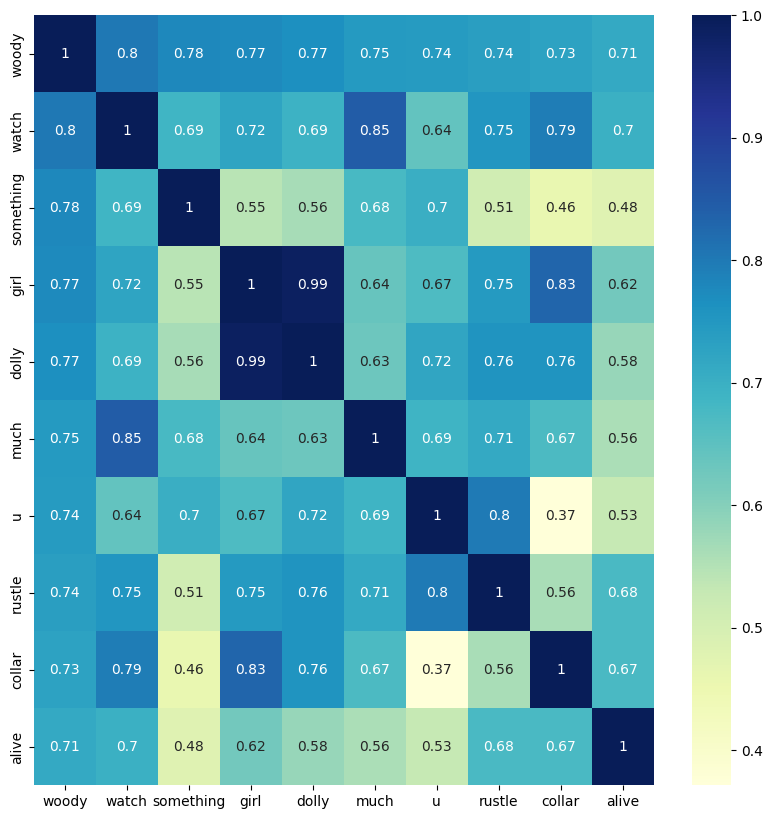

In [47]:
#Heatmap with similarity percentage for 10 closest words with word2vec.
# Get the first 10 unique words from 'similar_words'
words = sum([[k] + v for k, v in similar_words.items()], [])[:10]

# Calculate similarity scores
similarity_scores = [[w2v_model.wv.similarity(w1, w2) for w1 in words] for w2 in words]

# Create a DataFrame
df = pd.DataFrame(similarity_scores, columns=words, index=words)

# Plot a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, cmap='YlGnBu')
plt.show()

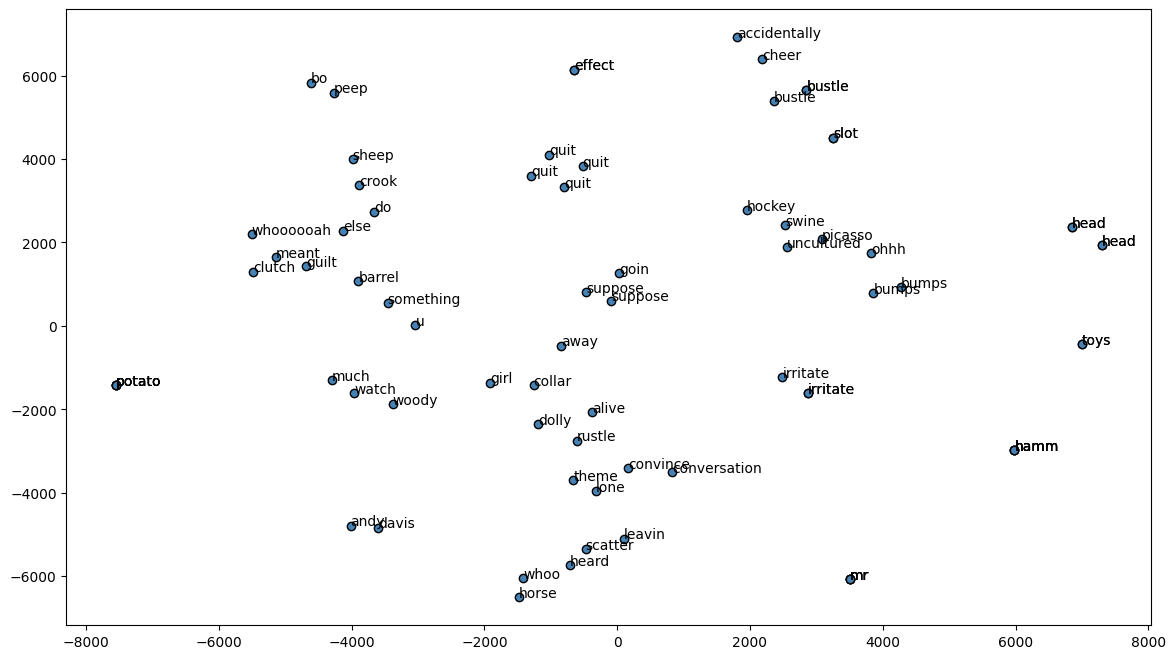

In [48]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'model' is your trained Word2Vec model
# And 'similar_words' is a dictionary of words and their most similar words

# Get all unique words from 'similar_words'
words = sum([[k] + v for k, v in similar_words.items()], [])

# Get the vector for each word
word_vectors = np.array([w2v_model.wv[word] for word in words])

# Use t-SNE to reduce dimensionality to 2
tsne = TSNE(n_components=2, random_state=42, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)

# Plot the t-SNE results
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(words, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

#### Clustering

K Means

In [49]:
from sklearn.cluster import KMeans

words = list(set(lemmatized_tokens))

# Get the vector for each word
word_vectors = np.array([w2v_model.wv[word] for word in words])

# We choose the number of clusters (e.g., 10)
num_clusters = 10

# We perform our k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(word_vectors)

# We get the cluster labels for each word
labels = kmeans.labels_

# Create a DataFrame with words and their cluster labels
df = pd.DataFrame({'word': words, 'label': labels})

# We then print the words in each cluster
for i in range(num_clusters):
    print(f"Cluster {i + 1}:")
    print(df[df['label'] == i]['word'].values)

Cluster 1:
['aah' 'kinda' 'lousy' ... 'detachment' 'speaking' 'dinner']
Cluster 2:
['first' 'right' 'yeah' 'great' 'boy' 'boot' 'guy' 'let' 'hat' 'help'
 'must' 'howdy' 'buster' 'minute' 'sure' 'get' 'na' 'house' 'new' 'huh'
 'girl' 'cowboy' 'gon' 'birthday' 'arm' 'window' 'know' 'christmas' 'name'
 'work' 'uh' 'pull' 'mean' 'miss' 'good' 'okay' 'party' 'oh' 'little'
 'mommy' 'enough' 'later' 'honey' 'laugh' 'walk' 'would' 'well' 'could'
 'gas' 'woody' 'think' 'change' 'bart' 'sheep' 'find' 'camp' 'cough'
 'scene' 'u' 'please' 'hey' 'want' 'wheezy']
Cluster 3:
['men' 'one' 'mom' 'friend' 'title' 'sarge' 'baby' 'come' 'monitor' 'ear'
 'present' 'room' 'leave' 'army' 'hear' 'everybody' 'appear' 'ok' 'molly'
 'andy' 'davis' 'place' 'worry' 'pick']
Cluster 4:
['camera' 'black' 'z' 'punch' 'crush' 'attention' 'pepperoni' 'important'
 'collar' 'call' 'patient' 'welcome' 'tie' 'hypersleep' 'skid' 'last'
 'annihilate' 'cargo' 'chair' 'nine' 'tape' 'cool' 'lower' 'keep' 'carry'
 'gate' 'dupe' '

c:\Users\icono\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


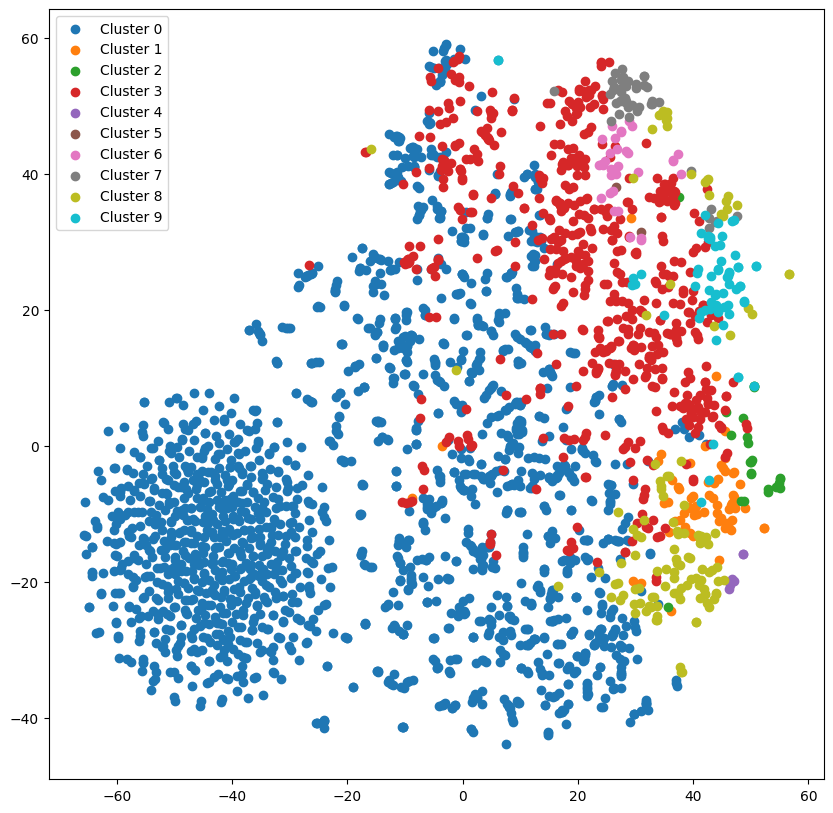

In [50]:
from sklearn.manifold import TSNE

# Use t-SNE to reduce dimensionality to 2
tsne_db = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne_db.fit_transform(word_vectors)

# Create a DataFrame with words, their 2D coordinates, and their cluster labels
df = pd.DataFrame({'word': words, 'x': word_vectors_2d[:, 0], 'y': word_vectors_2d[:, 1], 'label': labels})

# Plot each cluster
plt.figure(figsize=(10, 10))
for i in range(num_clusters):
    cluster_df = df[df['label'] == i]
    plt.scatter(cluster_df['x'], cluster_df['y'], label=f'Cluster {i}')

plt.legend()
plt.show()


Latent Dirichlet Allocation (LDA)

In [51]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Create a dictionary representation of your documents
dictionary = corpora.Dictionary([lemmatized_tokens])

# Convert your documents to vectors
corpus = [dictionary.doc2bow(text) for text in [lemmatized_tokens]]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42)
print('The following topics are shown with their words and corresponding weight')
# Print the topics
# Print the topics with word and weight
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx + 1}")
    
    # Split the string into word-weight pairs
    word_weight_pairs = topic.split(" + ")
    
    for pair in word_weight_pairs:
        # Split each pair into word and weight
        weight, word = pair.split("*")
        
        # Remove the quotes around the word
        word = word.replace('"', '')
        
        print(f"{word}: {weight}")
    
    print("\n")

The following topics are shown with their words and corresponding weight
Topic: 1
woody: 0.041
buzz: 0.021
andy: 0.013
get: 0.010
head: 0.010
lightyear: 0.010
look: 0.009
toy: 0.009
go: 0.008
potato: 0.008


Topic: 2
woody: 0.052
buzz: 0.045
lightyear: 0.015
head: 0.012
andy: 0.011
mr: 0.011
look: 0.011
go: 0.011
oh: 0.010
toy: 0.009


Topic: 3
woody: 0.046
buzz: 0.037
lightyear: 0.015
toy: 0.014
go: 0.011
andy: 0.011
look: 0.011
head: 0.011
get: 0.010
potato: 0.009


Topic: 4
woody: 0.055
buzz: 0.042
look: 0.013
andy: 0.013
get: 0.013
lightyear: 0.012
toy: 0.011
head: 0.011
go: 0.011
potato: 0.009


Topic: 5
woody: 0.039
buzz: 0.035
andy: 0.013
get: 0.011
lightyear: 0.010
look: 0.009
toy: 0.009
potato: 0.008
mr: 0.008
come: 0.008


Topic: 6
woody: 0.040
buzz: 0.030
andy: 0.012
lightyear: 0.011
mr: 0.011
rex: 0.010
head: 0.010
potato: 0.009
toy: 0.008
go: 0.008


Topic: 7
buzz: 0.031
woody: 0.029
andy: 0.014
lightyear: 0.014
look: 0.011
mr: 0.009
toy: 0.009
head: 0.009
rex: 0.008
get: 

---

#### Zero shot Model

Facebook/Bart-large-mnli

In [68]:
from transformers import pipeline, AutoTokenizer

# Define your candidate labels
label_genre = ["Action", "Adventure", "Animation", "Comedy", "Crime", "Documentary", 
          "Drama", "Family", "Fantasy", "Musical", 
          "Mystery", "Romance"]

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-mnli")

# Initialize the zero-shot classification pipeline with the tokenizer
classifier_genre = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", tokenizer=tokenizer)

# Get the classification results
result = classifier_genre(raw_text, label_genre)

# Extract labels and scores
label_genre = result['labels']
scores_genre = result['scores']

# Print each label and its corresponding score
for label_genre, scores_genre in zip(label_genre, scores_genre):
    print(f"{label_genre}: {scores_genre}")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBartForSequenceClassification: ['model.decoder.version', 'model.encoder.version']
- This IS expected if you are initializing TFBartForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBartForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBartForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForSequenceClassification for predictions without further training.
